# Forecasting with ML


In [1]:
import numpy as np
import pandas as pd

N=20
ts = pd.Series(
    np.arange(N),
    index=pd.period_range(start="2010", freq="A", periods=N, name="Year")
)
ts

Year
2010     0
2011     1
2012     2
2013     3
2014     4
2015     5
2016     6
2017     7
2018     8
2019     9
2020    10
2021    11
2022    12
2023    13
2024    14
2025    15
2026    16
2027    17
2028    18
2029    19
Freq: A-DEC, dtype: int64

In [5]:
# Lag features
X = pd.DataFrame({
    'y_lag_2': ts.shift(2),
    'y_lag_3': ts.shift(3),
    'y_lag_4': ts.shift(4),
    'y_lag_5': ts.shift(5),
    'y_lag_6': ts.shift(6),
})

In [6]:
X

,y_lag_2,y_lag_3,y_lag_4,y_lag_5,y_lag_6
Year,,,,,
2010,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN
2012,0.0,NaN,NaN,NaN,NaN
2013,1.0,0.0,NaN,NaN,NaN
2014,2.0,1.0,0.0,NaN,NaN
2015,3.0,2.0,1.0,0.0,NaN
2016,4.0,3.0,2.0,1.0,0.0
2017,5.0,4.0,3.0,2.0,1.0
2018,6.0,5.0,4.0,3.0,2.0


In [7]:
# Multistep targets
y = pd.DataFrame({
    "y_step_3": ts.shift(-2),
    "y_step_2": ts.shift(-1),
    "y_step_1": ts
})
y

,y_step_3,y_step_2,y_step_1
Year,,,
2010,2.0,1.0,0
2011,3.0,2.0,1
2012,4.0,3.0,2
2013,5.0,4.0,3
2014,6.0,5.0,4
2015,7.0,6.0,5
2016,8.0,7.0,6
2017,9.0,8.0,7
2018,10.0,9.0,8


In [11]:
data=pd.concat({"Targets":y,"Features":X}, axis=1)
data

Targets                   Features                                
     y_step_3 y_step_2 y_step_1  y_lag_2 y_lag_3 y_lag_4 y_lag_5 y_lag_6
Year                                                                    
2010      2.0      1.0        0      NaN     NaN     NaN     NaN     NaN
2011      3.0      2.0        1      NaN     NaN     NaN     NaN     NaN
2012      4.0      3.0        2      0.0     NaN     NaN     NaN     NaN
2013      5.0      4.0        3      1.0     0.0     NaN     NaN     NaN
2014      6.0      5.0        4      2.0     1.0     0.0     NaN     NaN
2015      7.0      6.0        5      3.0     2.0     1.0     0.0     NaN
2016      8.0      7.0        6      4.0     3.0     2.0     1.0     0.0
2017      9.0      8.0        7      5.0     4.0     3.0     2.0     1.0
2018     10.0      9.0        8      6.0     5.0     4.0     3.0     2.0
2019     11.0     10.0        9      7.0     6.0     5.0     4.0     3.0
2020     12.0     11.0       10      8.0     7.0     6.0     5.0     4.0
2021     13.0     12.0       11      9.0     8.0     7.0     6.0     5.0
2022     14.0     13.0       12     10.0     9.0     8.0     7.0     6.0
2023     15.0     14.0       13     11.0    10.0     9.0     8.0     7.0
2024     16.0     15.0       14     12.0    11.0    10.0     9.0     8.0
2025     17.0     16.0       15     13.0    12.0    11.0    10.0     9.0
2026     18.0     17.0       16     14.0    13.0    12.0    11.0    10.0
2027     19.0     18.0       17     15.0    14.0    13.0    12.0    11.0
2028      NaN     19.0       18     16.0    15.0    14.0    13.0    12.0
2029      NaN      NaN       19     17.0    16.0    15.0    14.0    13.0

In [13]:
data.head(10).style.set_properties(['Targets'], **{'background-color':
                                                       'LavenderBlush'}) \
    .set_properties(['Features'], **{'background-color': 'Lavender'})


# Example: Flu trends


In [15]:
from pathlib import Path
from warnings import simplefilter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

simplefilter("ignore")


In [20]:
# Matplotlib defaults
plt.style.use("seaborn-whitegrid")
# rc = runtime configuration = default style for plot elements
plt.rc("figure", autolayout=True, figsize=(11,4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

def setup_plot_design(ax, palette_kwargs):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))

def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    setup_plot_design(ax, palette_kwargs)
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)

    return ax

data_dir = Path("../data/time_series_kaggle")
flu_trends = pd.read_csv(data_dir/"flu-trends.csv")

# set week data as index
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True
)

# remove week column since it's already the index
flu_trends.drop("Week", axis=1, inplace=True)
flu_trends


,AInfluenza,AcuteBronchitis,BodyTemperature,BraunThermoscan,BreakAFever,Bronchitis,ChestCold,ColdAndFlu,ColdOrFlu,ColdVersusFlu,...,TreatingTheFlu,TreatmentForFlu,TreatmentForTheFlu,Tussin,Tussionex,TypeAInfluenza,UpperRespiratory,WalkingPneumonia,WhatToDoIfYouHaveTheFlu,FluVisits
Week,,,,,,,,,,,,,,,,,,,,,
2009-06-29/2009-07-05,36,20,43,27,11,22,16,7,3,8,...,16,6,13,25,34,30,25,24,15,180
2009-07-06/2009-07-12,25,19,40,31,10,21,11,6,8,8,...,16,7,8,27,32,27,28,29,9,115
2009-07-13/2009-07-19,24,30,45,20,12,20,20,6,6,8,...,16,6,9,24,28,25,25,25,9,132
2009-07-20/2009-07-26,23,19,40,15,10,19,12,7,10,15,...,8,5,12,21,26,26,29,24,13,109
2009-07-27/2009-08-02,27,21,44,20,11,19,17,8,10,15,...,8,8,12,33,29,21,27,30,9,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-30/2016-06-05,5,46,50,29,31,37,33,17,9,3,...,7,3,6,30,17,4,53,41,7,90
2016-06-06/2016-06-12,5,47,49,21,24,36,35,19,8,4,...,5,3,5,33,18,3,52,42,6,55
2016-06-13/2016-06-19,4,47,48,21,22,34,32,15,8,3,...,6,2,6,37,16,3,54,38,3,33


In [28]:
def make_lags(ts, lags, lead_time=1):
    lags_dict = {
        f'y_lag_{i}' : ts.shift(i)
        for i in range (lead_time, lags+lead_time)
    }
    return pd.concat(lags_dict, axis=1)


# Four weeks of lag features
y = flu_trends.FluVisits.copy()
X = make_lags(y, lags=4).fillna(0.0)
X


,y_lag_1,y_lag_2,y_lag_3,y_lag_4
Week,,,,
2009-06-29/2009-07-05,0.0,0.0,0.0,0.0
2009-07-06/2009-07-12,180.0,0.0,0.0,0.0
2009-07-13/2009-07-19,115.0,180.0,0.0,0.0
2009-07-20/2009-07-26,132.0,115.0,180.0,0.0
2009-07-27/2009-08-02,109.0,132.0,115.0,180.0
...,...,...,...,...
2016-05-30/2016-06-05,124.0,156.0,211.0,305.0
2016-06-06/2016-06-12,90.0,124.0,156.0,211.0
2016-06-13/2016-06-19,55.0,90.0,124.0,156.0


In [30]:
pd.concat([X, y], axis=1)

,y_lag_1,y_lag_2,y_lag_3,y_lag_4,FluVisits
Week,,,,,
2009-06-29/2009-07-05,0.0,0.0,0.0,0.0,180
2009-07-06/2009-07-12,180.0,0.0,0.0,0.0,115
2009-07-13/2009-07-19,115.0,180.0,0.0,0.0,132
2009-07-20/2009-07-26,132.0,115.0,180.0,0.0,109
2009-07-27/2009-08-02,109.0,132.0,115.0,180.0,120
...,...,...,...,...,...
2016-05-30/2016-06-05,124.0,156.0,211.0,305.0,90
2016-06-06/2016-06-12,90.0,124.0,156.0,211.0,55
2016-06-13/2016-06-19,55.0,90.0,124.0,156.0,33


In [32]:
def make_multistep_target(ts, steps):
    steps_dict = {
        f'y_step_{i+1}':ts.shift(-i)
        for i in range(steps)
    }
    return pd.concat(steps_dict, axis=1)

# Eight-week forecast
y = make_multistep_target(y, steps=8).dropna()
y

y_step_1                                               \
                      y_step_1 y_step_2 y_step_3 y_step_4 y_step_5 y_step_6   
Week                                                                          
2009-06-29/2009-07-05      180    115.0    132.0    109.0    120.0    115.0   
2009-07-06/2009-07-12      115    132.0    109.0    120.0    115.0    123.0   
2009-07-13/2009-07-19      132    109.0    120.0    115.0    123.0    205.0   
2009-07-20/2009-07-26      109    120.0    115.0    123.0    205.0    454.0   
2009-07-27/2009-08-02      120    115.0    123.0    205.0    454.0    628.0   
...                        ...      ...      ...      ...      ...      ...   
2016-02-22/2016-02-28     1023   1305.0   1619.0   1326.0   1100.0    955.0   
2016-02-29/2016-03-06     1305   1619.0   1326.0   1100.0    955.0    712.0   
2016-03-07/2016-03-13     1619   1326.0   1100.0    955.0    712.0    616.0   
2016-03-14/2016-03-20     1326   1100.0    955.0    712.0    616.0    578.0   
2016-03-21/2016-03-27     1100    955.0    712.0    616.0    578.0    455.0   

                                        y_step_2           ... y_step_7  \
                      y_step_7 y_step_8 y_step_1 y_step_2  ... y_step_7   
Week                                                       ...            
2009-06-29/2009-07-05    123.0    205.0    115.0    132.0  ...   1025.0   
2009-07-06/2009-07-12    205.0    454.0    132.0    109.0  ...   1338.0   
2009-07-13/2009-07-19    454.0    628.0    109.0    120.0  ...   1620.0   
2009-07-20/2009-07-26    628.0    687.0    120.0    115.0  ...   2078.0   
2009-07-27/2009-08-02    687.0    821.0    115.0    123.0  ...   2862.0   
...                        ...      ...      ...      ...  ...      ...   
2016-02-22/2016-02-28    712.0    616.0   1305.0   1619.0  ...    156.0   
2016-02-29/2016-03-06    616.0    578.0   1619.0   1326.0  ...    124.0   
2016-03-07/2016-03-13    578.0    455.0   1326.0   1100.0  ...     90.0   
2016-03-14/2016-03-20    455.0    305.0   1100.0    955.0  ...     55.0   
2016-03-21/2016-03-27    305.0    211.0    955.0    712.0  ...     33.0   

                               y_step_8                                      \
                      y_step_8 y_step_1 y_step_2 y_step_3 y_step_4 y_step_5   
Week                                                                          
2009-06-29/2009-07-05   1338.0    205.0    454.0    628.0    687.0    821.0   
2009-07-06/2009-07-12   1620.0    454.0    628.0    687.0    821.0   1025.0   
2009-07-13/2009-07-19   2078.0    628.0    687.0    821.0   1025.0   1338.0   
2009-07-20/2009-07-26   2862.0    687.0    821.0   1025.0   1338.0   1620.0   
2009-07-27/2009-08-02   2926.0    821.0   1025.0   1338.0   1620.0   2078.0   
...                        ...      ...      ...      ...      ...      ...   
2016-02-22/2016-02-28    124.0    616.0    578.0    455.0    305.0    211.0   
2016-02-29/2016-03-06     90.0    578.0    455.0    305.0    211.0    156.0   
2016-03-07/2016-03-13     55.0    455.0    305.0    211.0    156.0    124.0   
2016-03-14/2016-03-20     33.0    305.0    211.0    156.0    124.0     90.0   
2016-03-21/2016-03-27     27.0    211.0    156.0    124.0     90.0     55.0   

                                                  
                      y_step_6 y_step_7 y_step_8  
Week                                              
2009-06-29/2009-07-05   1025.0   1338.0   1620.0  
2009-07-06/2009-07-12   1338.0   1620.0   2078.0  
2009-07-13/2009-07-19   1620.0   2078.0   2862.0  
2009-07-20/2009-07-26   2078.0   2862.0   2926.0  
2009-07-27/2009-08-02   2862.0   2926.0   2414.0  
...                        ...      ...      ...  
2016-02-22/2016-02-28    156.0    124.0     90.0  
2016-02-29/2016-03-06    124.0     90.0     55.0  
2016-03-07/2016-03-13     90.0     55.0     33.0  
2016-03-14/2016-03-20     55.0     33.0     27.0  
2016-03-21/2016-03-27     33.0     27.0     22.0  

[352 rows x 64 columns]

In [33]:
# since we did shifting, now some of the indexes (times) don't match between X and y.
# we need to align them
y, X = y.align(X, join='inner', axis=0)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns = y.columns)
y_fit

y_step_1                                      \
                         y_step_1    y_step_2    y_step_3    y_step_4   
Week                                                                    
2009-06-29/2009-07-05   28.781293   69.197817  112.768304  156.804489   
2009-07-06/2009-07-12  297.510961  362.175672  427.583432  466.931997   
2009-07-13/2009-07-19   91.602934  132.871659  152.194343  181.589898   
2009-07-20/2009-07-26  189.476842  210.480859  236.055293  245.741985   
2009-07-27/2009-08-02  105.722043  130.391563  157.451984  193.114990   
...                           ...         ...         ...         ...   
2014-06-16/2014-06-22   48.798592   79.555206  115.862405  156.044718   
2014-06-23/2014-06-29   48.593794   82.047545  120.878855  162.048623   
2014-06-30/2014-07-06   39.810331   74.988160  114.525849  156.717607   
2014-07-07/2014-07-13   50.133572   87.442584  129.018706  171.032204   
2014-07-14/2014-07-20   43.270702   81.232553  122.087761  164.428424   

                                                                       \
                         y_step_5    y_step_6    y_step_7    y_step_8   
Week                                                                    
2009-06-29/2009-07-05  201.911000  246.278496  283.159214  314.315639   
2009-07-06/2009-07-12  492.867056  480.843160  471.236320  471.477502   
2009-07-13/2009-07-19  187.379491  233.867715  280.045232  304.413528   
2009-07-20/2009-07-26  294.993936  332.777441  351.703787  376.104133   
2009-07-27/2009-08-02  217.893598  248.637445  278.380580  300.086981   
...                           ...         ...         ...         ...   
2014-06-16/2014-06-22  197.466215  238.715878  273.403221  302.591372   
2014-06-23/2014-06-29  204.672448  245.513723  279.608911  308.765254   
2014-06-30/2014-07-06  199.232961  241.596420  277.294291  307.196471   
2014-07-07/2014-07-13  214.145960  254.623678  288.259874  317.213835   
2014-07-14/2014-07-20  206.217788  248.278872  283.795840  313.312270   

                         y_step_2              ...    y_step_7              \
                         y_step_1    y_step_2  ...    y_step_7    y_step_8   
Week                                           ...                           
2009-06-29/2009-07-05   69.197817  112.768304  ...  408.576616  417.566642   
2009-07-06/2009-07-12  362.175672  427.583432  ...  439.130159  436.679747   
2009-07-13/2009-07-19  132.871659  152.194343  ...  403.466803  408.522301   
2009-07-20/2009-07-26  210.480859  236.055293  ...  448.334261  458.459920   
2009-07-27/2009-08-02  130.391563  157.451984  ...  364.763223  368.553570   
...                           ...         ...  ...         ...         ...   
2014-06-16/2014-06-22   79.555206  115.862405  ...  389.896602  397.743406   
2014-06-23/2014-06-29   82.047545  120.878855  ...  395.122885  403.091177   
2014-06-30/2014-07-06   74.988160  114.525849  ...  397.098554  405.313914   
2014-07-07/2014-07-13   87.442584  129.018706  ...  402.685613  410.738931   
2014-07-14/2014-07-20   81.232553  122.087761  ...  402.475073  410.629610   

                         y_step_8                                      \
                         y_step_1    y_step_2    y_step_3    y_step_4   
Week                                                                    
2009-06-29/2009-07-05  314.315639  341.757717  363.953260  381.702484   
2009-07-06/2009-07-12  471.477502  465.306506  457.165456  450.792632   
2009-07-13/2009-07-19  304.413528  330.440250  354.664834  372.984539   
2009-07-20/2009-07-26  376.104133  398.627307  415.079712  428.682009   
2009-07-27/2009-08-02  300.086981  319.191858  334.987673  347.016032   
...                           ...         ...         ...         ...   
2014-06-16/2014-06-22  302.591372  328.291834  349.013453  365.436999   
2014-06-23/2014-06-29  308.765254  334.238726  354.670849  370.920087   
2014-06-30/2014-07-06  307.196471  333.510449  354.787986  371.703396   
2014-07-07

In [36]:
y_pred

y_step_1                                         \
                          y_step_1     y_step_2     y_step_3     y_step_4   
Week                                                                        
2014-07-21/2014-07-27    39.380261    76.533293   117.062237   158.535954   
2014-07-28/2014-08-03    41.398769    79.390693   121.214406   163.702832   
2014-08-04/2014-08-10    46.901402    86.237335   128.739530   171.475751   
2014-08-11/2014-08-17    45.236399    84.299986   125.830649   167.808038   
2014-08-18/2014-08-24    40.001981    77.908023   118.739972   160.299939   
...                            ...          ...          ...          ...   
2016-02-22/2016-02-28   947.004019   994.949304  1011.928958   978.963417   
2016-02-29/2016-03-06  1109.119660  1136.354924  1113.161506  1045.828817   
2016-03-07/2016-03-13  1428.127077  1430.435601  1384.961161  1275.937768   
2016-03-14/2016-03-20  1723.110544  1708.684148  1636.981058  1501.932437   
2016-03-21/2016-03-27  1115.467519   990.146600   806.462563   643.358492   

                                                                         \
                          y_step_5     y_step_6    y_step_7    y_step_8   
Week                                                                      
2014-07-21/2014-07-27   202.413870   246.205241  282.305108  312.818664   
2014-07-28/2014-08-03   207.548550   249.872061  285.002040  314.943086   
2014-08-04/2014-08-10   214.101837   255.118294  289.491999  318.619214   
2014-08-11/2014-08-17   210.153372   252.409066  287.704272  317.261566   
2014-08-18/2014-08-24   203.860156   247.600037  283.733225  314.147146   
...                            ...          ...         ...         ...   
2016-02-22/2016-02-28   913.964716   817.462903  738.934215  677.190756   
2016-02-29/2016-03-06   940.829769   838.201200  756.521372  682.263088   
2016-03-07/2016-03-13  1154.011898  1011.896718  888.147514  788.210271   
2016-03-14/2016-03-20  1328.203605  1137.685356  980.393063  847.872355   
2016-03-21/2016-03-27   495.502006   462.857290  433.162438  379.459161   

                          y_step_2               ...    y_step_7              \
                          y_step_1     y_step_2  ...    y_step_7    y_step_8   
Week                                             ...                           
2014-07-21/2014-07-27    76.533293   117.062237  ...  405.494659  414.275996   
2014-07-28/2014-08-03    79.390693   121.214406  ...  404.537494  413.011358   
2014-08-04/2014-08-10    86.237335   128.739530  ...  405.387236  413.493078   
2014-08-11/2014-08-17    84.299986   125.830649  ...  406.656357  414.988712   
2014-08-18/2014-08-24    77.908023   118.739972  ...  406.712670  415.463018   
...                            ...          ...  ...         ...         ...   
2016-02-22/2016-02-28   994.949304  1011.928958  ...  448.553232  423.139772   
2016-02-29/2016-03-06  1136.354924  1113.161506  ...  436.701686  406.403575   
2016-03-07/2016-03-13  1430.435601  1384.961161  ...  447.727703  410.134565   
2016-03-14/2016-03-20  1708.684148  1636.981058  ...  398.965455  346.887225   
2016-03-21/2016-03-27   990.146600   806.462563  ...  280.358072  257.849312   

                         y_step_8                                      \
                         y_step_1    y_step_2    y_step_3    y_step_4   
Week                                                                    
2014-07-21/2014-07-27  312.818664  339.858355  361.715382  379.158850   
2014-07-28/2014-08-03  314.943086  341.191804  362.314759  379.176050   
2014-08-04/2014-08-10  318.619214  344.047411  364.510010  380.825406   
2014-08-11/2014-08-17  317.261566  343.333055  364.425201  381.233591   
2014-08-18/2014-08-24  314.147146  341.119255  362.948316  380.366796   
...                           ...         ...         ...         ...   
2016-02-22/2016-02-28  677.190756  616.091291  562.408438  518.170903   
2016-02-29/2016-03-06  682.263088  614.733807

Train RMSE: 508.82
Test RMSE: 688.83


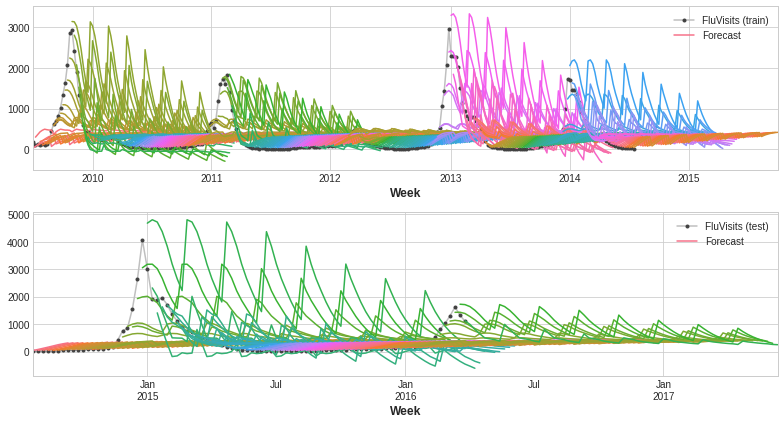

In [37]:
# compute some error metrics
from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}")

palette=dict(palette="husl", n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))

ax1 = flu_trends.FluVisits[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['FluVisits (train)', 'Forecast'])

ax2 = flu_trends.FluVisits[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['FluVisits (test)', 'Forecast'])


In [39]:
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor

model = MultiOutputRegressor(XGBRegressor())
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)


Train RMSE: 2.04
Test RMSE: 610.12


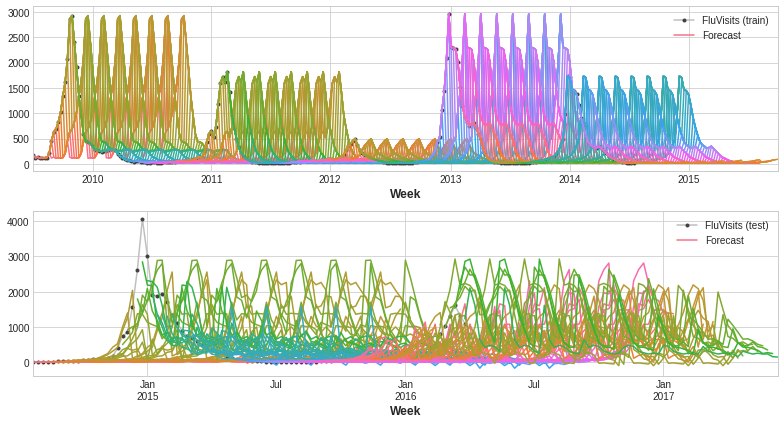

In [40]:
train_rmse = mean_squared_error(y_train, y_fit, squared=False)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

palette = dict(palette='husl', n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
ax1 = flu_trends.FluVisits[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['FluVisits (train)', 'Forecast'])
ax2 = flu_trends.FluVisits[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['FluVisits (test)', 'Forecast'])
